In [1]:
from algorithms.root_to_liveql import root_to_liveql
from eflint.eflint_lib import EF
from eflint.eflint_parser import create_graph, get_node_to_type_map, get_parameter_facts
from graph_visualizer import visualize_graph

from eflint.save_and_open import save_dsl_to_file, open_liveql
ef = EF()

In [2]:
type_res = ef.types()
fact_res = ef.facts()
node_name_to_node = create_graph(type_res)
node_to_type_map = get_node_to_type_map(type_res)
parameter_facts = get_parameter_facts(type_res, fact_res)

In [3]:
node_name_to_node

{'access': access -> (OR),
 'read': read -> (None),
 'write': write -> (None),
 'actor': actor -> (None),
 'asset': asset -> (None),
 'int': int -> (None),
 'string': string -> (None)}

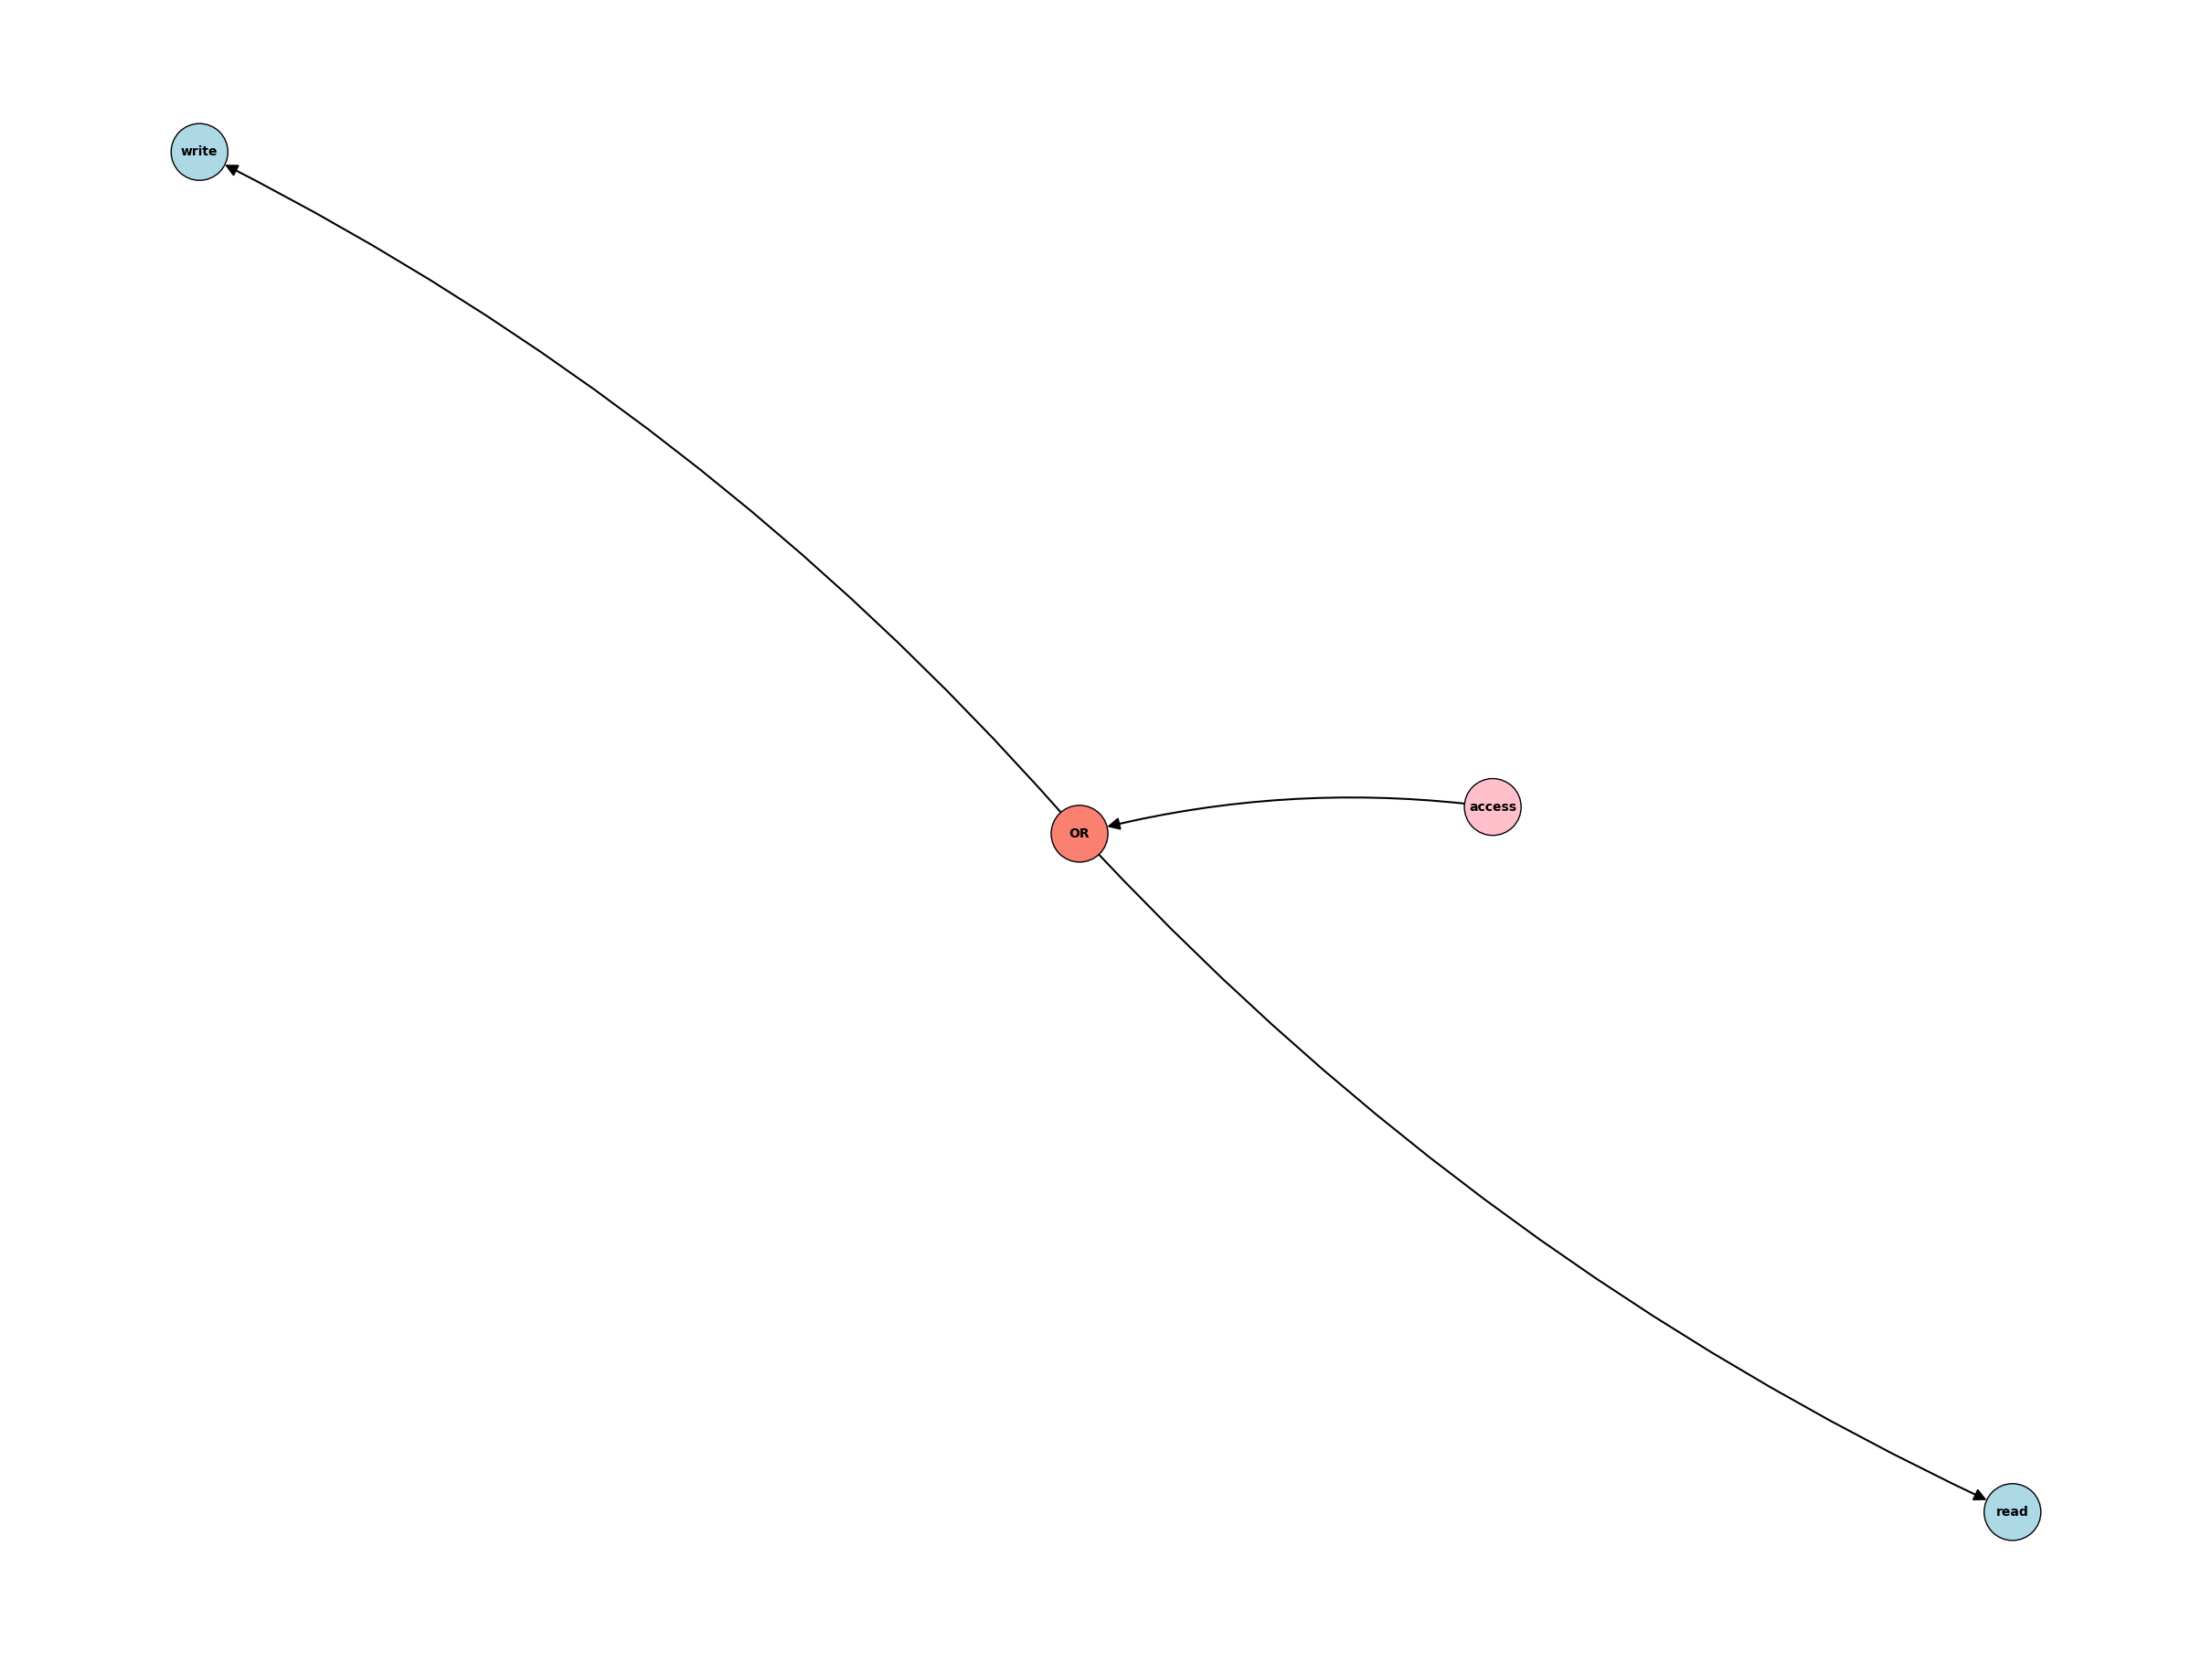

<module 'matplotlib.pyplot' from '/Users/tiemfah/Projects/eFLINTAnswers/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [4]:
root = node_name_to_node["access"]
visualize_graph(root)

In [5]:
dsl_content = root_to_liveql(root, node_to_type_map, parameter_facts)
print(dsl_content)

form accessForm {

	"Is the actor read?" read: bool
	"Is the actor not read?" not_read: bool
	if (read) {
		"Property access holds" result: bool(true)
	}
	if (not_read) {
		"Is the actor write?" write: bool
		"Is the actor not write?" not_write: bool
		if (write) {
			"Property access holds" result: bool(true)
		}
		if (not_read && not_write) {
			"Property access does not holds" result: bool(true)
		}
	}
}


In [6]:
save_dsl_to_file(dsl_content, "human", "/Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql")
open_liveql()

DSL saved to /Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql
+(0, answerable("Is the actor read?", read, boolean))
+(0, answerable("Is the actor not read?", not_read, boolean))
+(0, ifThen(read, [computed("Property access holds", result, boolean)]))
+(0, ifThen(not_read, [answerable("Is the actor write?", write, boolean); answerable("Is the actor not write?", not_write, boolean); answerable("Is the actor not write?", not_write, boolean); answerable("Is the actor not write?", not_write, boolean)]))
